# Python|分分钟教你学会写KNN算法 

## 1. 什么是KNN算法?

**K最近邻**(k-Nearest Neighbor，KNN)分类算法是一个比较成熟也是最简单的**机器学习**(Machine Learning)算法之一。该方法的思路是：如果一个样本在**特征空间**中与K个实例最为相似(即特征空间中最邻近)，那么这K个实例中大多数属于哪个类别，则该样本也属于这个类别。

其中，计算样本与其他实例的相似性一般采用**距离衡量法**。离得越近越相似，离得越远越不相似。

![KNN示意图](img/../pic/1.jpg)

如上图所示，K=3，距离绿色样本最近的3个实例中（圆圈内），有两个是红色三角形（正类）、一个是蓝色正方形（负类）。则该样本属于红色三角形（正类）。

## 2. KNN算法本质

我们知道,一般机器学习算法包括两个过程：**训练过程**和**测试过程**。训练过程通过使用机器学习算法在训练样本上迭代训练，得到较好的机器学习模型；测试过程是使用测试数据来验证模型的好坏，通过正确率来呈现。KNN算法的本质是在训练过程中，它将所有训练样本的输入和输出标签(label)都存储起来。测试过程中，计算测试样本与每个训练样本的距离，选取与测试样本距离最近的前k个训练样本。然后对着k个训练样本的label进行投票，票数最多的那一类别即为测试样本所归类。

其实，KNN算法非常简单，可以说在训练过程中基本没有算法参与，只有**存储训练样本**。可以说KNN算法实际上是一种**识记类算法**。因此，KNN虽然简单，但是其明显包含了以下几个缺点：

* 整个训练过程需要将所有的训练样本极其输出label存储起来，因此，**空间成本**很大。

* 测试过程中，每个测试样本都需要与所有的训练样本进行比较，运行**时间成本**很大。

* 采用距离比较的方式，分类**准确率**不高。

好了，介绍完了KNN算法的理论知识之后，我相信大家都跃跃欲试了。接下来，我们就来手把手教大家使用Python实现一个KNN分类问题，进入机器学习实战大门。开始吧～

## 3. 数据准备

### 数据下载与归类

首先，数据集我们选择经典的鸢尾花卉数据集（Iris）。Iris数据集每个样本x包含了花萼长度（sepal length）、花萼宽度（sepal width）、花瓣长度（petal length）、花瓣宽度（petal width）四个特征。样本标签y共有三类，分别是Setosa，Versicolor和Virginica。Iris数据集总共包含150个样本，每个类别由50个样本，整体构成一个150行5列的二维表，如下图展示了10个样本：

![](img/../pic/2.png)

如何获取这些数据呢？很简单，我们可以使用代码，直接从网上下载，下载后的数据集存放在'../data/'目录下。

In [27]:
import numpy as np
import pandas as pd

#data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)    # 下载iris数据集
data = pd.read_csv('./data/iris.data.csv', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']    # 特征及类别名称

然后，我们将三个类别的数据分别提取出来，setosa、versicolor、virginica分别用0、1、2来表示。

In [28]:
X = data.iloc[0:150, 0:4].values
y = data.iloc[0:150, 4].values
y[y == 'Iris-setosa'] = 0                                 # Iris-setosa 输出label用0表示
y[y == 'Iris-versicolor'] = 1                             # Iris-versicolor 输出label用1表示
y[y == 'Iris-virginica'] = 2                              # Iris-virginica 输出label用2表示
X_setosa, y_setosa = X[0:50], y[0:50]                     # Iris-setosa 4个特征
X_versicolor, y_versicolor = X[50:100], y[50:100]         # Iris-versicolor 4个特征
X_virginica, y_virginica = X[100:150], y[100:150]         # Iris-virginica 4个特征

接下来看一下三种类别不同特征的空间分布。为了可视性，我们只选择sepal length和petal length两个特征，在二维平面上作图。

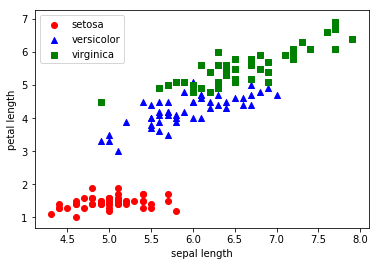

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X_setosa[:, 0], X_setosa[:, 2], color='red', marker='o', label='setosa')
plt.scatter(X_versicolor[:, 0], X_versicolor[:, 2], color='blue', marker='^', label='versicolor')
plt.scatter(X_virginica[:, 0], X_virginica[:, 2], color='green', marker='s', label='virginica')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()

由上图可见，三个类别之间是有较明显区别的。

### 训练集、验证集、测试集划分

接下来，我们要将每个类别的所有样本分成**训练样本**（training set）、**验证集(validation set)**和**测试样本**（test set），各占所有样本的比例分别为60%，20%，20%。

In [66]:
# training set
X_setosa_train = X_setosa[:30, :]
y_setosa_train = y_setosa[:30]
X_versicolor_train = X_versicolor[:30, :]
y_versicolor_train = y_versicolor[:30]
X_virginica_train = X_virginica[:30, :]
y_virginica_train = y_virginica[:30]
X_train = np.vstack([X_setosa_train, X_versicolor_train, X_virginica_train])
y_train = np.hstack([y_setosa_train, y_versicolor_train, y_virginica_train])

# validation set
X_setosa_val = X_setosa[30:40, :]
y_setosa_val = y_setosa[30:40]
X_versicolor_val = X_versicolor[30:40, :]
y_versicolor_val = y_versicolor[30:40]
X_virginica_val = X_virginica[30:40, :]
y_virginica_val = y_virginica[30:40]
X_val = np.vstack([X_setosa_val, X_versicolor_val, X_virginica_val])
y_val = np.hstack([y_setosa_val, y_versicolor_val, y_virginica_val])

# test set
X_setosa_test = X_setosa[40:50, :]
y_setosa_test = y_setosa[40:50]
X_versicolor_test = X_versicolor[40:50, :]
y_versicolor_test = y_versicolor[40:50]
X_virginica_test = X_virginica[40:50, :]
y_virginica_test = y_virginica[40:50]
X_test = np.vstack([X_setosa_test, X_versicolor_test, X_virginica_test])
y_test = np.hstack([y_setosa_test, y_versicolor_test, y_virginica_test])

## 4. KNN训练函数和预测函数

KNN的训练过程实际上是一种数据标类、数据存储的过程，不包含机器学习算法。首先我们需要定义一个**类**（class）来实现KNN算法模块。该类的初始化定义为：

```python
class KNearestNeighbor(object):
    def __init__(self):
        pass
```

然后，在KNearestNeighbor类中定义训练函数，训练函数保存所有训练样本。

```python
def train(self, X, y):
    self.X_train = X
    self.y_train = y
    
```

KNN的测试过程是核心部分。其中，有两点需要注意：

* 衡量距离的方式

* K值的选择

### 衡量距离的方式

KNN距离衡量一般有两种方式：**L1距离**和**L2距离**。

L1距离的计算公式为：

$$d1(I_1,I_2)=\sum_p|I_1^p-I_2^p|$$

其中，$I_1$和$I_2$分别表示两个样本，$p$表示特征维度。

L2距离的计算公式为：

$$d2(I_1,I_2)=\sqrt{\sum_p(I_1^p-I_2^p)^2}$$

一般来说，L1距离和L2距离都比较常用。需要注意的是，如果两个样本距离越大，那么使用L2会继续扩大距离，即对距离大的情况**惩罚性越大**。反过来说，如果两个样本距离较小，那么使用L2会缩小距离，减小惩罚。这里，我们使用最常用的L2距离。

### K值的选择

KNN中K值的选择至关重要，K值太小会使模型过于复杂，造成**过拟合**（overfitting）；K值太大会使模型分类模糊，造成**欠拟合**(underfitting)。实际应用中，我们可以选择不同的K值，通过验证来决定K值大小。代码中，我们将K设定为可调参数。

在KNearestNeighbor类中定义预测函数：

```python
def predict(self, X, k=1)
    # 计算L2距离
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))    # 初始化距离函数
    # because(X - X_train)*(X - X_train) = -2X*X_train + X*X + X_train*X_train, so
    d1 = -2 * np.dot(X, self.X_train.T)    # shape (num_test, num_train)
    d2 = np.sum(np.square(X), axis=1, keepdims=True)    # shape (num_test, 1)
    d3 = np.sum(np.square(self.X_train), axis=1)    # shape (1, num_train)
    dist = np.sqrt(d1 + d2 + d3)
    # 根据K值，选择最可能属于的类别
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        dist_k_min = np.argsort(dist[i])[:k]    # 最近邻k个实例位置
        y_kclose = self.y_train[dist_k_min]     # 最近邻k个实例对应的标签
        y_pred[i] = np.argmax(np.bincount(y_kclose))    # 找出k个标签中从属类别最多的作为预测类别
    
    return y_pred
```

KNearestNeighbor类的完整定义代码如下：

In [154]:
class KNearestNeighbor(object):
    def __init__(self):
        pass

    # 训练函数
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    # 预测函数
    def predict(self, X, k=1):
        # 计算L2距离
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))    # 初始化距离函数
        # because(X - X_train)*(X - X_train) = -2X*X_train + X*X + X_train*X_train, so
        d1 = -2 * np.dot(X, self.X_train.T)    # shape (num_test, num_train)
        d2 = np.sum(np.square(X), axis=1, keepdims=True)    # shape (num_test, 1)
        d3 = np.sum(np.square(self.X_train), axis=1)    # shape (1, num_train)
        dist = np.sqrt(d1 + d2 + d3)
        # 根据K值，选择最可能属于的类别
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            dist_k_min = np.argsort(dist[i])[:k]    # 最近邻k个实例位置
            y_kclose = self.y_train[dist_k_min]     # 最近邻k个实例对应的标签
            y_pred[i] = np.argmax(np.bincount(y_kclose.tolist()))    # 找出k个标签中从属类别最多的作为预测类别

        return y_pred


## 5. 训练和预测

### 选择合适的K值 

首先，创建一个KnearestNeighbor实例对象。

In [155]:
KNN = KNearestNeighbor()

然后，在验证集上进行k-fold交叉验证。选择不同的K值，根据验证结果，选择最佳的K值。

In [176]:
num_folds = 5    # 训练数据分为5 folds
K_classes = [3, 5, 7, 9, 11, 13, 15]    # 所有K值

# 把训练数据分成5份
X_train_folds = []
y_train_folds = []
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)

# 字典用来存储不同K值对应的准确率
K_accuracy = []
k_best = K_classes[0]

for k in K_classes:
    accuracies = []
    for i in range(num_folds):
        Xtr = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
        ytr = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])
        Xcv = X_train_folds[i]
        ycv = y_train_folds[i]
        KNN.train(Xtr, ytr)
        ycv_pred = KNN.predict(Xcv, k=k)
        accuracy = np.mean(ycv_pred == ycv)
        accuracies.append(accuracy)
    accuracies_avg = np.mean(accuracies)
    K_accuracy.append(accuracies_avg)
    if accuracies_avg > k_best:
        k_best = accuracies_avg

# 打印出验证结果
for k in range(len(K_classes)):
    print('k = %d, accuracy: %f' % (K_classes[k], K_accuracy[k]))
print('Best K is: %d\n' % k_best)

k = 3, accuracy: 0.888889
k = 5, accuracy: 0.877778
k = 7, accuracy: 0.888889
k = 9, accuracy: 0.888889
k = 11, accuracy: 0.866667
k = 13, accuracy: 0.855556
k = 15, accuracy: 0.877778
Best K is: 3



作图，查看验证结果。

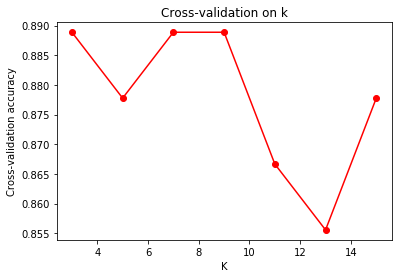

In [180]:
# Plot the cross validation
plt.plot(K_classes, K_accuracy, 'ro-')
plt.title('Cross-validation on k')
plt.xlabel('K')
plt.ylabel('Cross-validation accuracy')
plt.show()

可见，K值取3的时候，验证集的准确率最高。此例中，由于总体样本数据量不够多，所以验证结果并不明显。但是使用k-fold交叉验证来选择最佳K值是最常用的方法之一。

### 对测试集进行预测

选择完合适的K值之后，就可以对测试集进行预测分析了。

In [194]:
KNN.train(X_train, y_train)
y_pred = KNN.predict(X_test, k=6)
accuracy = np.mean(y_pred == y_test)
print('测试集预测准确率：%f' % accuracy)

测试集预测准确率：1.000000


最终结果显示，测试集预测准确率为100%。

最后，我们把预测结果绘图表示。仍然只选择sepal length和petal length两个特征，在二维平面上作图。

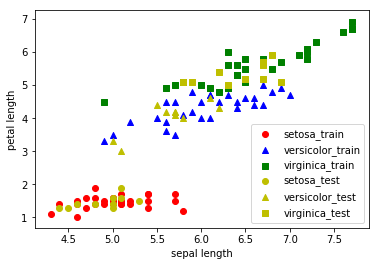

In [204]:
# 训练集
plt.scatter(X_setosa_train[:, 0], X_setosa_train[:, 2], color='red', marker='o', label='setosa_train')
plt.scatter(X_versicolor_train[:, 0], X_versicolor_train[:, 2], color='blue', marker='^', label='versicolor_train')
plt.scatter(X_virginica_train[:, 0], X_virginica_train[:, 2], color='green', marker='s', label='virginica_train')
# 测试集
plt.scatter(X_setosa_test[:, 0], X_setosa_test[:, 2], color='y', marker='o', label='setosa_test')
plt.scatter(X_versicolor_test[:, 0], X_versicolor_test[:, 2], color='y', marker='^', label='versicolor_test')
plt.scatter(X_virginica_test[:, 0], X_virginica_test[:, 2], color='y', marker='s', label='virginica_test')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 4)
plt.show()

## 6. KNN算法总结 

KNN算法是一种最简单最直观的分类算法。它的训练过程保留了所有样本的所有特征，把所有信息都记下来，没有经过处理和提取。而其它机器学习算法包括神经网络则是在训练过程中提取最重要、最有代表性的特征。在这一点上，KNN算法还非常不够“智能”。但是，KNN算法作为机器学习的第一个算法，还是值得我们了解一下的。